Genauigkeit: 0.97


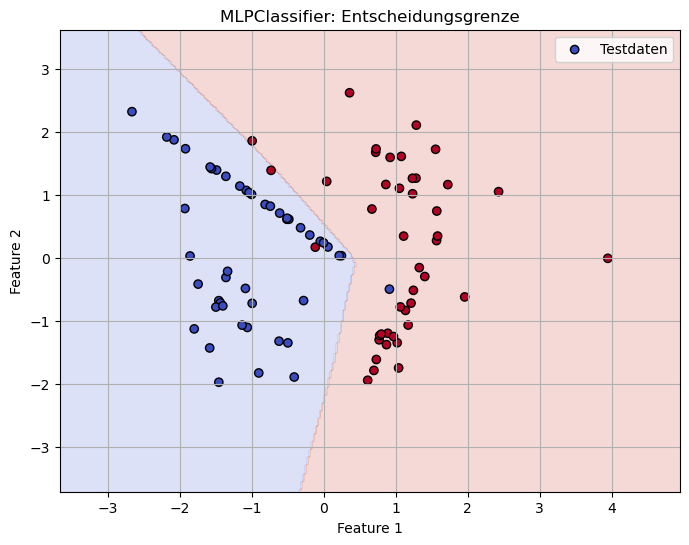

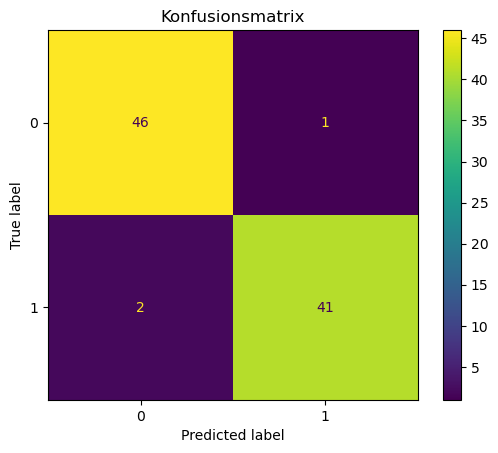

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Beispiel-Daten generieren
input_data, output_data = make_classification(n_samples=300, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)

# Train/Test-Split
input_data_train, input_data_test, output_data_train, output_data_test = train_test_split(input_data, output_data, test_size=0.3, random_state=42)

# MLPClassifier trainieren
mlp = MLPClassifier(hidden_layer_sizes=(150,), max_iter=1000, random_state=42)
mlp.fit(input_data_train, output_data_train)

# Vorhersagen und Genauigkeit
output_data_pred = mlp.predict(input_data_test)
print(f"Genauigkeit: {accuracy_score(output_data_test, output_data_pred):.2f}")

# Entscheidungsgrenze visualisieren
xx, yy = np.meshgrid(np.linspace(input_data[:, 0].min() - 1, input_data[:, 0].max() + 1, 300),
                     np.linspace(input_data[:, 1].min() - 1, input_data[:, 1].max() + 1, 300))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.scatter(input_data_test[:, 0], input_data_test[:, 1], c=output_data_test, cmap='coolwarm', edgecolors='k', label="Testdaten")
plt.title("MLPClassifier: Entscheidungsgrenze")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# Konfusionsmatrix anzeigen
ConfusionMatrixDisplay.from_predictions(output_data_test, output_data_pred)
plt.title("Konfusionsmatrix")
plt.show()